In [42]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [43]:
g=9.8 
rho=1.225    #大气密度
S=100.0   #开伞后表面积
Cd=0.05    #阻力系数
M=85.0    #跳伞运动员质量

init_z = State(y=2000.0 , v=0.0 )

t_end=50 
t_center=17
dt=0.1

system_z = System(init=init_z, t_0=0, t_end=t_end, dt=dt)

,values
init,y 2000.0 v 0.0 dtype: float64
t_0,0
t_end,50
dt,0.1


In [44]:
def acceleration(t,v):
    if t<t_center:
        a=g
    else :
        a=g-0.5*rho*S*Cd*v**2/M
    return a

In [45]:
def slope_func_z(state, t, system):
    y, v = state
    dydt = -v
    dvdt=acceleration(t,v)
    return dydt, dvdt

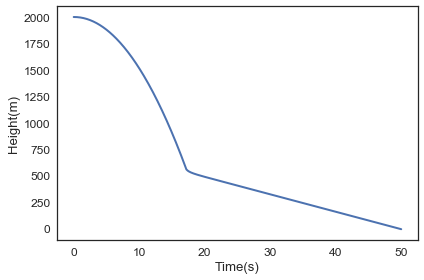

In [46]:
Vz, Az = slope_func_z(system_z.init, 0, system_z)

results_z, details_z = run_euler(system_z, slope_func_z)

plot(results_z.y)
decorate(xlabel='Time(s)',
         ylabel='Height(m)')
x=[0,10,20,30,40,50]
y=[0,0,0,0,0,0]
plot(x,y)

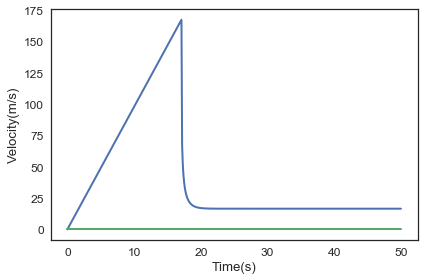

In [48]:
plot(results_z.v)
decorate(xlabel='Time(s)',
         ylabel='Velocity(m/s)')
x=[0,10,20,30,40,50]
y=[0,0,0,0,0,0]
plot(x,y)